# Problem Statement

To build an application to clarify the patients to be healthy or suffering from cardiovascular disease based on the given attributes.

In [1]:
#Important libs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Normalizing
from sklearn.preprocessing import StandardScaler

#Models

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\singh\Files-main\cardio_train.csv", sep = ';')

df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [3]:
#All are int and float types. Understand the stats of dataframes.

df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
#Observations
#1. No missing values
#2. Assuming age is in number of days
#3. Outliers in height
#4. Outliers in systolic blood_pressure ap_hi
#5. Outliers in ap_lo
#6. Seems Cholestrol and glucose are binary. Will see in further analysis.


In [5]:
#Drop id and remove duplicates.

df.drop('id',axis = 1,inplace = True)

#Duplicate removal

df.drop_duplicates(inplace = True)

In [6]:
df.shape

(69277, 12)

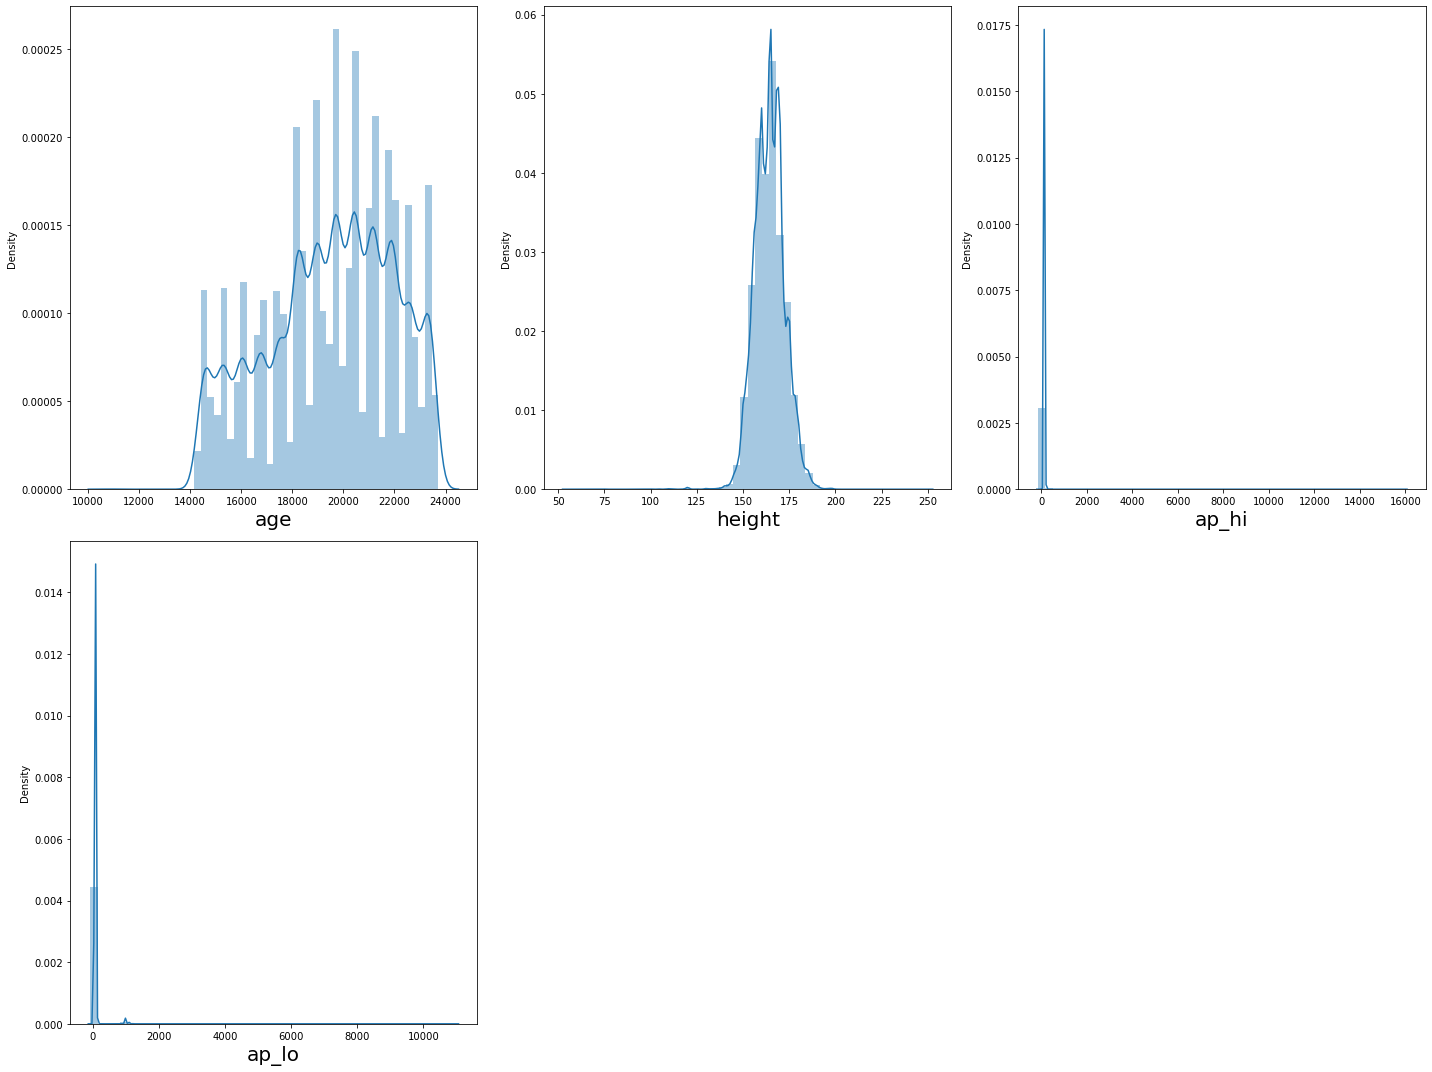

In [7]:
plt.figure(figsize = (20,15))

plotnumber = 1

for column in df[['age','height','ap_hi','ap_lo']]:
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

In [8]:
#With std3 let's see the stats
from scipy import stats

#zscore = (x-mean)/std

from scipy.stats import zscore

In [9]:
z_score = zscore(df[['age','height','ap_hi','ap_lo']])

abs_z_score = np.abs(z_score) #Apply formula and get the scaled data

filtering_entry = (abs_z_score < 3).all(axis = 1)

df = df[filtering_entry]
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68004.000000,68004.000000,68004.000000,68004.000000,68004.000000,68004.000000,68004.000000,68004.000000,68004.000000,68004.000000,68004.000000,68004.000000
mean,19465.527881,1.347921,164.412388,74.078592,126.297585,81.348391,1.364846,1.226090,0.087642,0.053629,0.803762,0.494897
std,2467.331737,0.476314,7.710593,14.233900,17.932835,10.269339,0.679028,0.572043,0.282775,0.225286,0.397154,0.499978
min,14275.000000,1.000000,140.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17658.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19702.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,188.000000,200.000000,401.000000,602.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,0


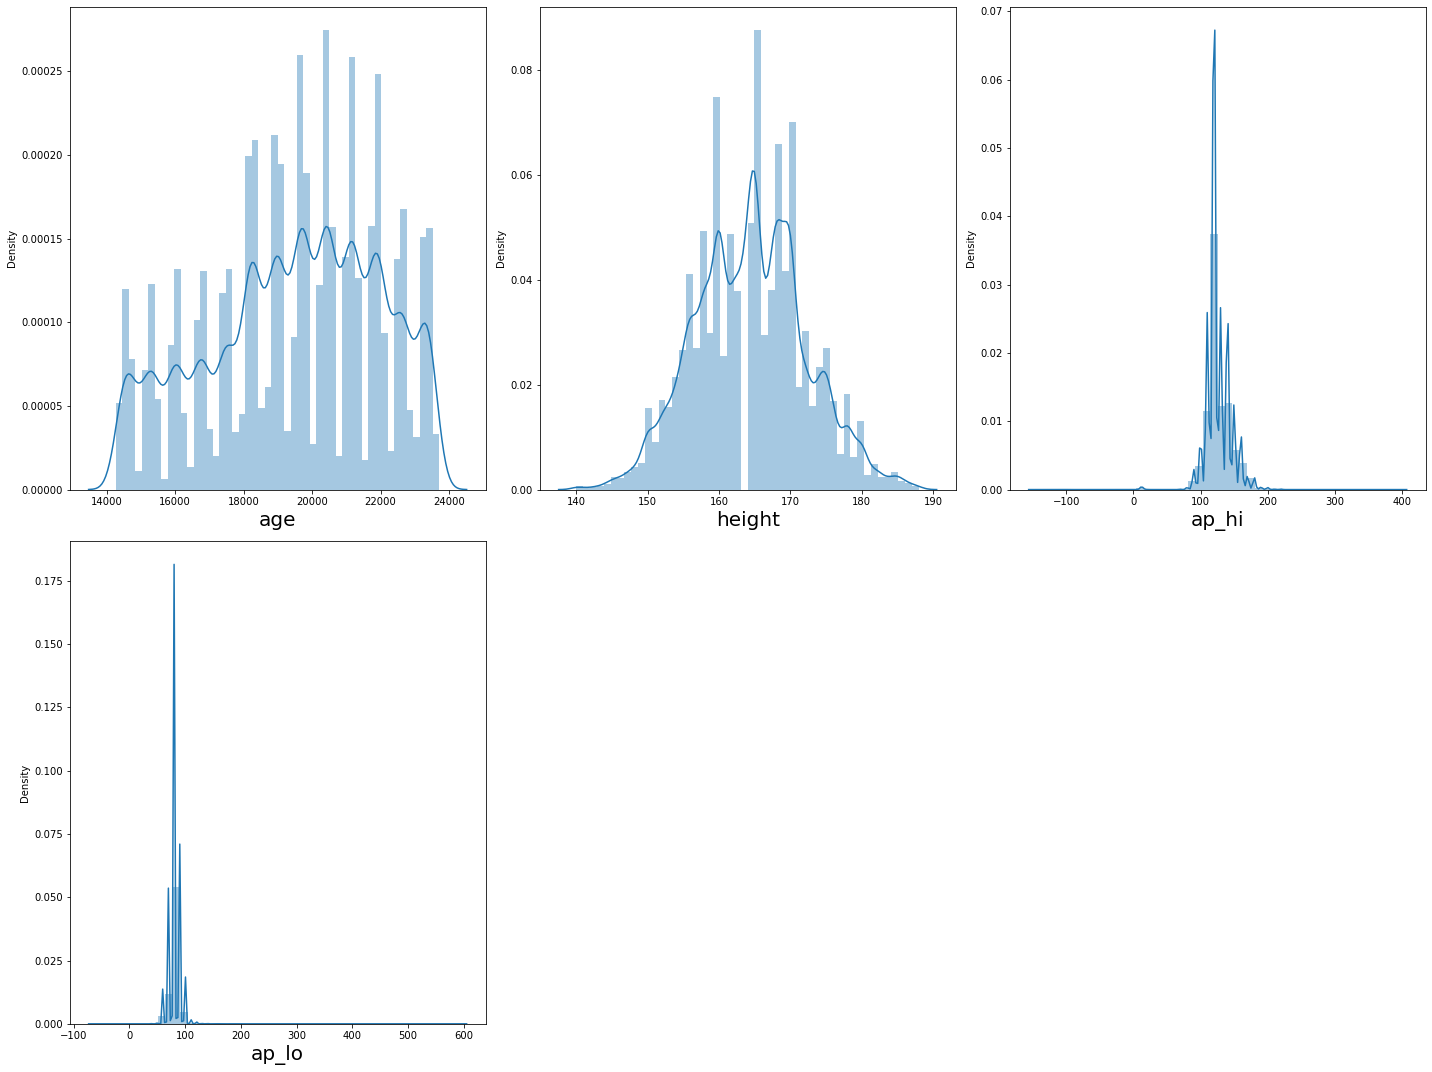

In [11]:
#Let's check how much skewness we removed.

plt.figure(figsize = (20,15))

plotnumber = 1

for column in df[['age','height','ap_hi','ap_lo']]:
    if plotnumber <=6:
        ax = plt.subplot(2,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
        
    plotnumber += 1
    
plt.tight_layout()

In [12]:
x = df.drop(columns = ['cardio'], axis = 1)
y = df['cardio']

In [13]:
#Split into train test split data set.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.30, random_state = 41)

In [14]:
#Model Confidence/Accuracy

def metric_score(clf,x_train,x_test,y_train,y_test,train = True):
    if train:
        y_pred = clf.predict(x_train)
        print('\n===================================Train Result=================================')
        print(f"Accurancy Score: {accuracy_score(y_train,y_pred) *100:.2f}%")
        
    elif train == False:
        pred = clf.predict(x_test)
        
        print('\n====================================Test Result================================')
        print(f"Accurancy Score: {accuracy_score(y_test,pred) *100:.2f}%")
        
        print('\n\n Test Classification Report \n', classification_report(y_test,pred,digits = 2))

In [15]:
random_clf = RandomForestClassifier()

In [16]:
#Train the model

random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [17]:
#Call the function and pass dataset to check train and test score.

metric_score(random_clf,x_train,x_test,y_train,y_test,train = True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 99.99%

====================================Test Result================================
Accurancy Score: 70.60%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.73      0.71     10167
           1       0.72      0.69      0.70     10235

    accuracy                           0.71     20402
   macro avg       0.71      0.71      0.71     20402
weighted avg       0.71      0.71      0.71     20402



In [19]:
#Let's tune the parameters using GridSearchCV

#RandomForestClassifier

params = {
    'n_estimators':[13,15],
    'criterion':['gini','entropy'],
    'max_depth':[10,15],
    'min_samples_leaf':[5,6],
    'min_samples_split':[10,11],
}
grd = GridSearchCV(random_clf, param_grid = params)
grd.fit(x_train,y_train)

print('best_params=>', grd.best_params_)

best_params=> {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 13}


In [20]:
random_clf = grd.best_estimator_
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=10,
                       n_estimators=13)

In [21]:
#Call the function and pass dataset to check train and test score

metric_score(random_clf,x_train,x_test,y_train,y_test,train = True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train = False)


===================================Train Result=================================
Accurancy Score: 75.18%

====================================Test Result================================
Accurancy Score: 72.56%


 Test Classification Report 
               precision    recall  f1-score   support

           0       0.70      0.78      0.74     10167
           1       0.76      0.67      0.71     10235

    accuracy                           0.73     20402
   macro avg       0.73      0.73      0.72     20402
weighted avg       0.73      0.73      0.72     20402

